In [1]:
import pandas as pd
import numpy as np
from os.path import join, exists
from os import listdir
import matplotlib.pyplot as plt
import subprocess

In [6]:
# prepare experiment settings
banks =['x', 'y']
weighted = 'weight'
feature_settings = [['demographics'], ['revenue'], [f'filtered_network_features_{weighted}'],
            ['demographics', 'revenue'], ['demographics', 'revenue', f'filtered_network_features_{weighted}']]
output = 'results/with-mcc-dist/'

with open('exp_batch.bat', 'w') as f:
    for bank in banks:
        label = f'labels/labels_{bank}.csv'
        for features in feature_settings:
            fset = ' '.join([f'features/{feat}_{bank}.csv' for feat in features])
            cmd = f'python run_experiment.py -O {output} -L {label} -F {fset}\n'
            f.write(cmd)

In [5]:
subprocess.call('exp_batch.bat')

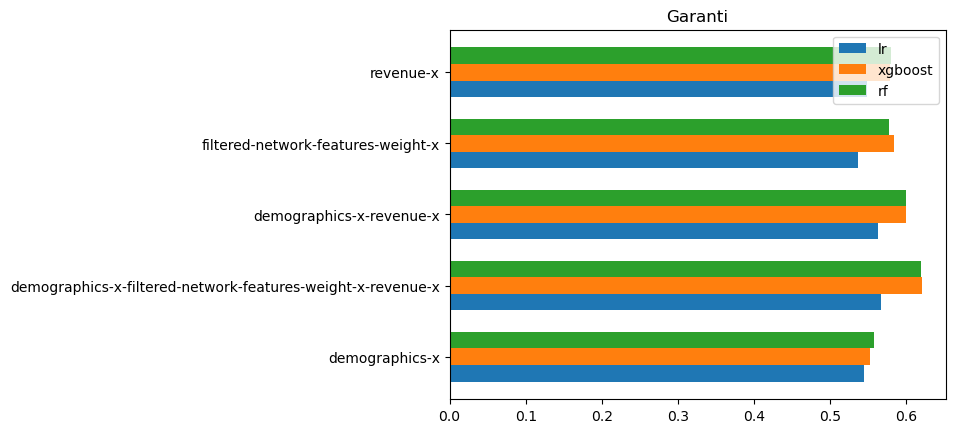

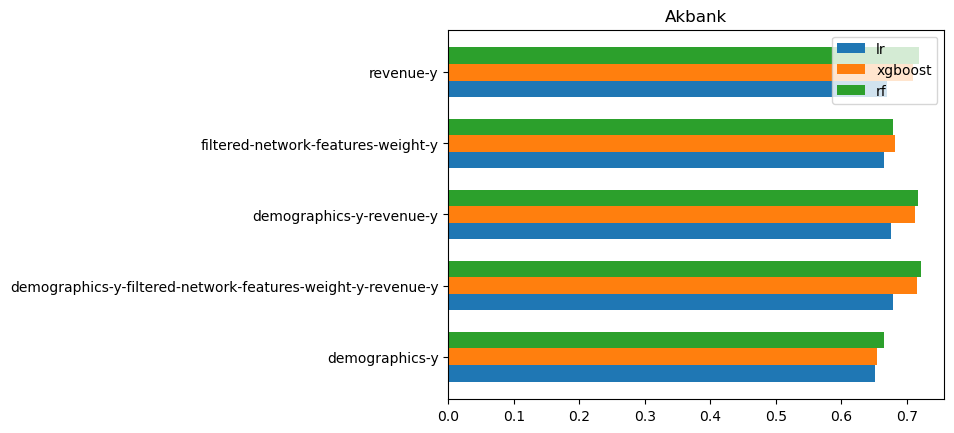

In [7]:
for bank in banks:

    entries = []
    indices = []

    for f in listdir(output):
        if 'fimp' not in f and f'labels_{bank}' in f:
            df = pd.read_csv(join(output, f))
            entries.append(df.iloc[5,1:].to_list())
            fname = f.split('.')[0]
            ind = "-".join(fname.split('_')[2:]).replace(f'_{bank}', '')
            indices.append(ind)

    res = pd.DataFrame(entries, index=indices, columns=df.columns[1:])

    #ax = res.loc[col_names[::-1]].plot.barh(rot=0, width=0.7)
    ax = res.plot.barh(rot=0, width=0.7)
    #ax.set_xlim([0.6, 0.7])
    #fig_name = output.split('\\')[-1]
    fig_name = 'Akbank' if bank == 'y' else 'Garanti'
    ax.set_title(fig_name)

    plt.savefig(join('figures', f'weighted-mcc-{bank}_{fig_name}.png'), bbox_inches='tight')